In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_un = pd.read_csv('bigmart.csv')

# Explore the dataset
data_un.head()
data_un.info()
data_un.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [40]:
# Drop rows with any NaN values
data = data_un.dropna(axis=0)
data = data_un.dropna(axis=1)

# Drop the specified columns
data = data_un.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

# Display the cleaned dataset
print(data.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998         NaN               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket

In [41]:
from sklearn.impute import SimpleImputer

# Handle missing values in 'Item_Weight' 
imputer_item_weight = SimpleImputer(strategy='mean')
data['Item_Weight'] = imputer_item_weight.fit_transform(data[['Item_Weight']])


In [42]:
missing_values = data.isnull().sum()
print(missing_values)

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


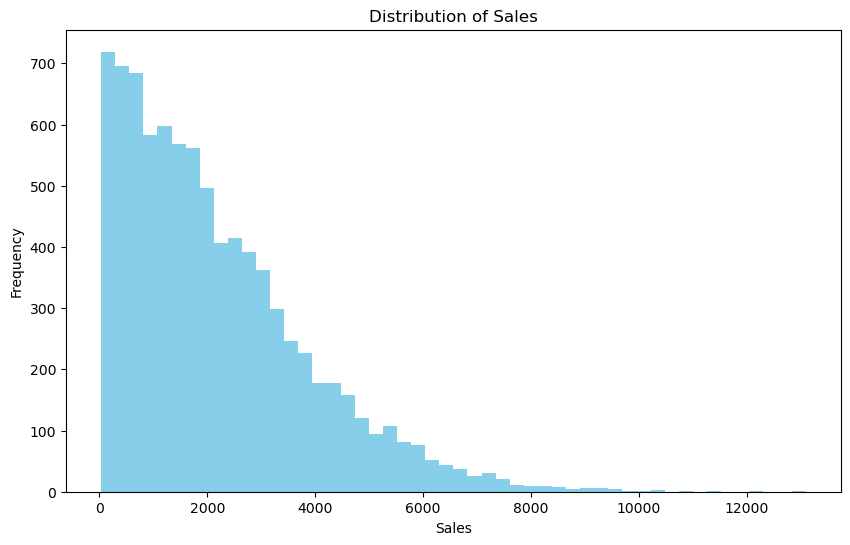

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(data['Item_Outlet_Sales'], bins=50, color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

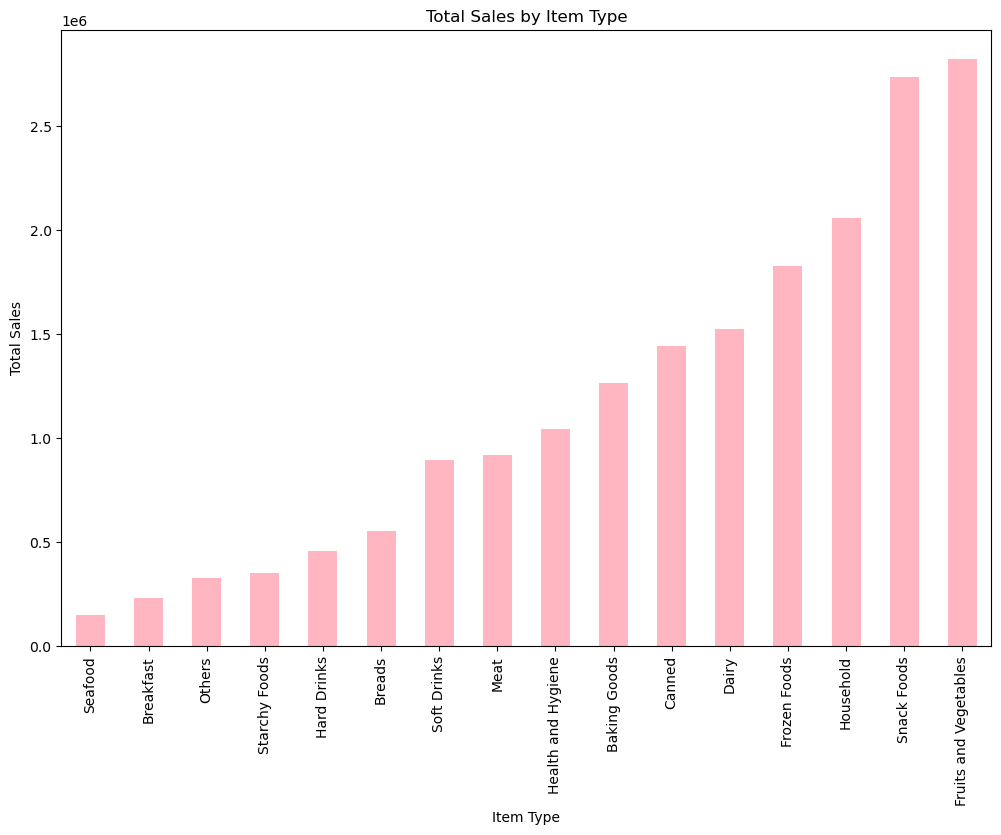

In [44]:
total_sales_by_item_type = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=(12, 8))
total_sales_by_item_type.plot(kind='bar', color='lightpink')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.show()

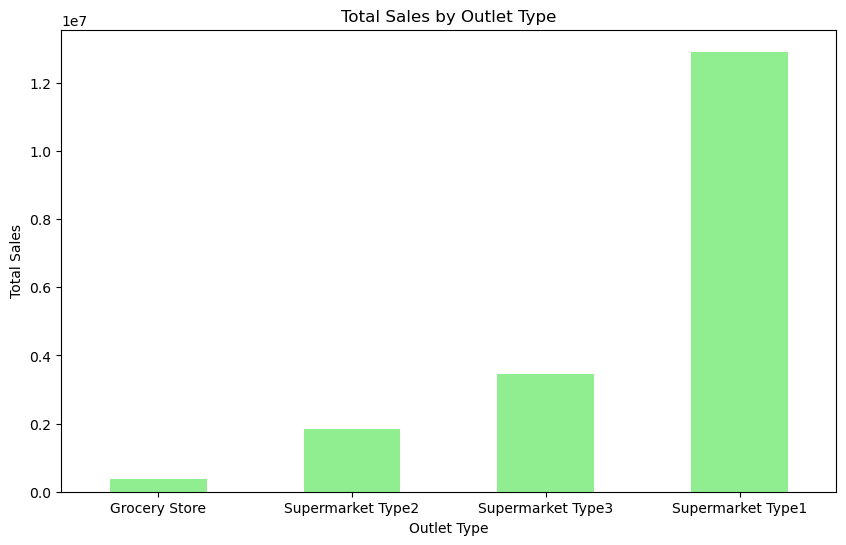

In [45]:
total_sales_by_outlet_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
total_sales_by_outlet_type.plot(kind='bar', color='lightgreen')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Type')
plt.xticks(rotation=0)
plt.show()

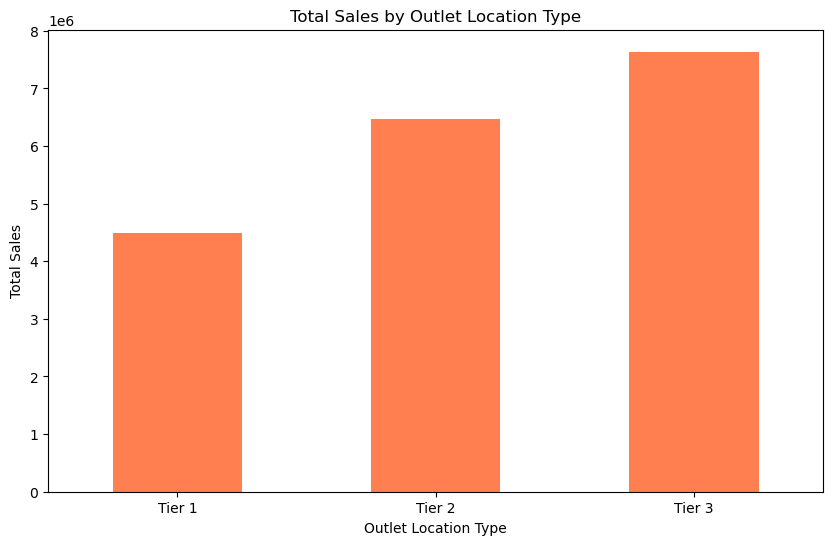

In [46]:
total_sales_by_location_type = data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
total_sales_by_location_type.plot(kind='bar', color='coral')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location Type')
plt.xticks(rotation=0)
plt.show()

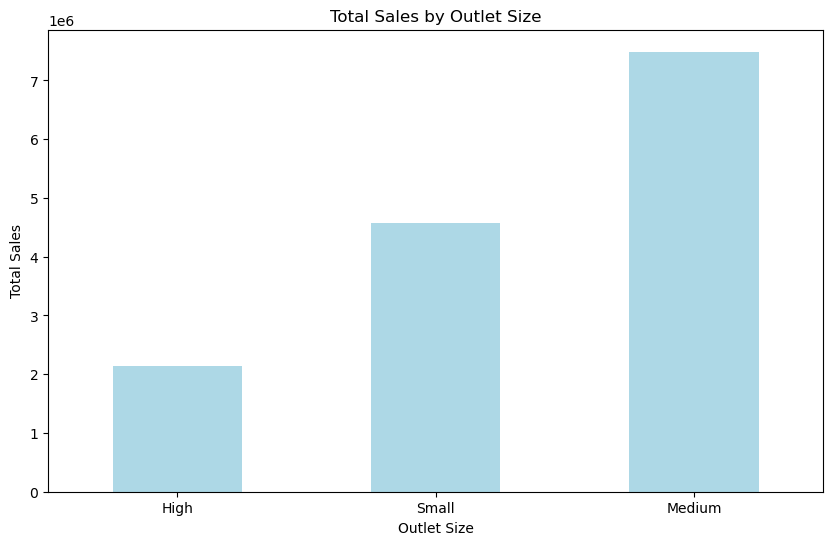

In [47]:
total_sales_by_outlet_size = data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
total_sales_by_outlet_size.plot(kind='bar', color='lightblue')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Size')
plt.xticks(rotation=0)
plt.show()

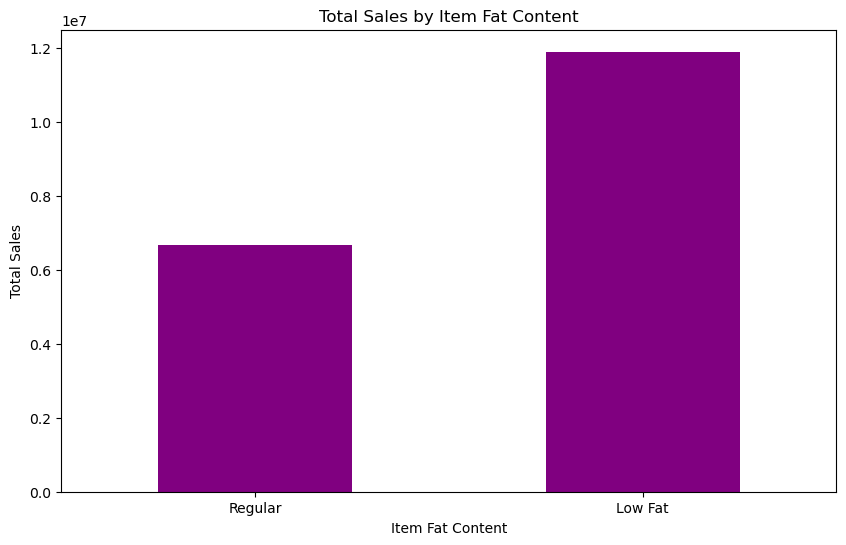

In [48]:
# Replace values in the Item_Fat_Content column
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

total_sales_by_fat_content = data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
total_sales_by_fat_content.plot(kind='bar', color='purple')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Fat Content')
plt.xticks(rotation=0)
plt.show()

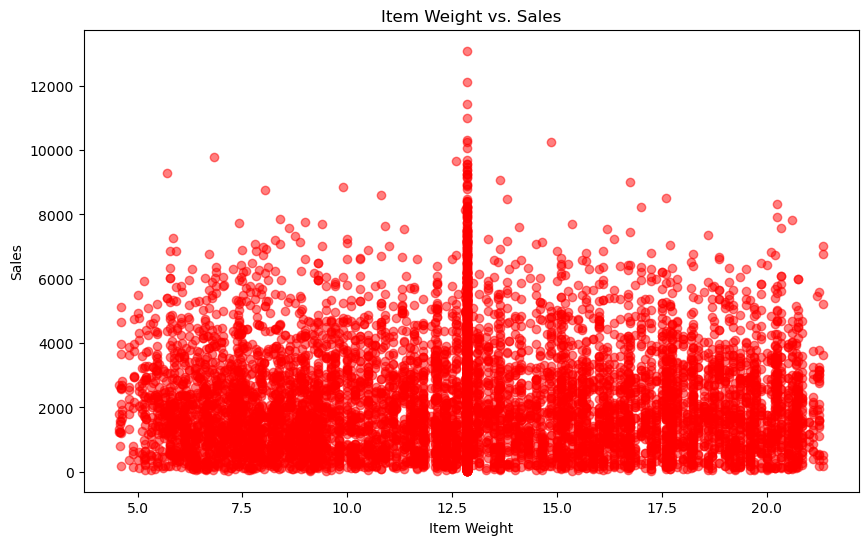

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'], alpha=0.5, color='red')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.title('Item Weight vs. Sales')
plt.show()

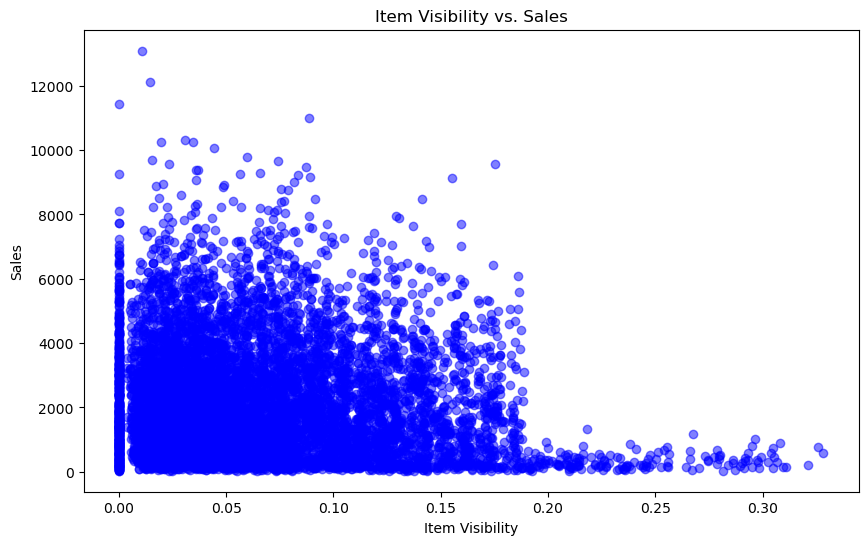

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'], alpha=0.5, color='blue')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs. Sales')
plt.show()

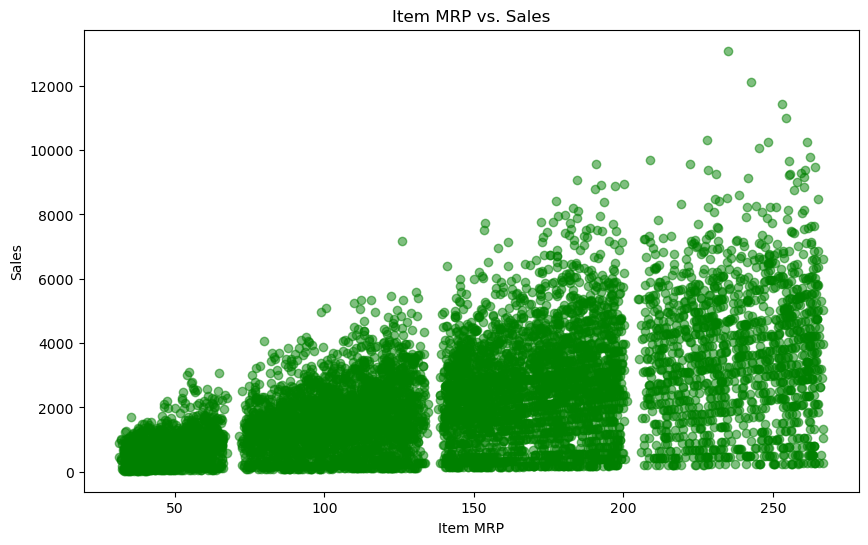

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'], alpha=0.5, color='green')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.title('Item MRP vs. Sales')
plt.show()

First, let’s split the data into training and testing sets. We’ll use 80% of the data for training and 20% for testing.

In [52]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['Item_Outlet_Sales'])  # Features
y = data['Item_Outlet_Sales']  # Target

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (6818, 32), (6818,)
Test set: (1705, 32), (1705,)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We’ll use Linear Regression and Random Forest Regressor as examples.

Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print("Training set:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"R-squared: {r2_score(y_train, y_pred_train)}")

print("\nTest set:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"R-squared: {r2_score(y_test, y_pred_test)}")

Linear Regression Performance:
Training set:
MAE: 847.2209104796333
MSE: 1303094.3922570946
R-squared: 0.5594752325556047

Test set:
MAE: 792.0247141085226
MSE: 1143541.2997210394
R-squared: 0.5792664114419414


Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance:")
print("Training set:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_rf)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train_rf)}")
print(f"R-squared: {r2_score(y_train, y_pred_train_rf)}")

print("\nTest set:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_test_rf)}")

Random Forest Regressor Performance:
Training set:
MAE: 299.48229002904077
MSE: 186100.58465954047
R-squared: 0.9370867396364059

Test set:
MAE: 764.4239074639296
MSE: 1195998.4304543606
R-squared: 0.5599662979573882


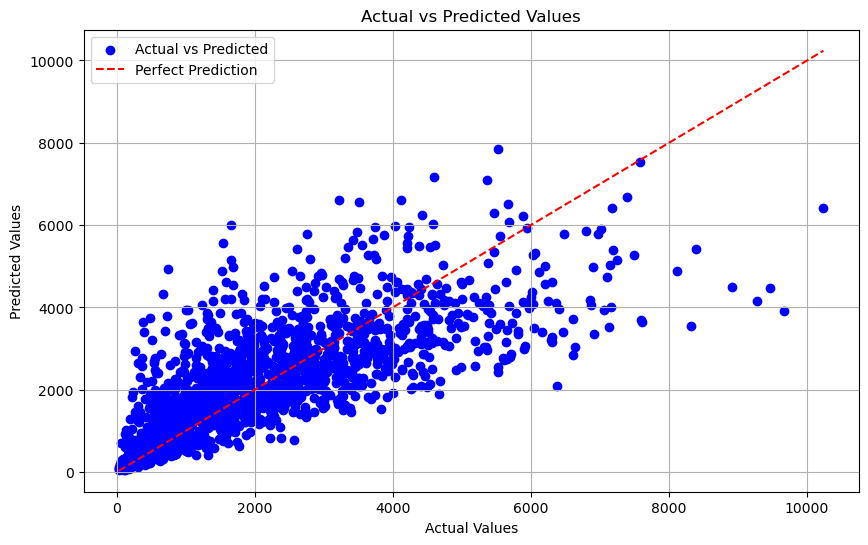

In [57]:
# Visualization: Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Ensure y_test and y_pred have the same length
if len(y_test) == len(y_pred_test_rf):
    plt.scatter(y_test, y_pred_test_rf, color='blue', label='Actual vs Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')  # Adding a line for perfect prediction
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: y_test and y_pred must have the same length.")